# <h1>Group Question 2: Does an Academy Award require a certain budget?<h1>

This question explores the relationship between film production budgets and one of the highest-level artistic recognitions for a film, the Academy Award. Since Academy Awards nominations are known to help drive subsequent box-office sales (see [this link](https://knowledge.wharton.upenn.edu/article/oscars-economics/#:~:text=%E2%80%9CAccording%20to%20the%20data%2C%20it,the%20movie%2C%E2%80%9D%20he%20said.&text=%E2%80%9CThere's%20no%20evidence%20that%20%5BOscar,%2C%20your%20salary%20goes%20up.%E2%80%9D)), is there any way we can possibly quantify differences between award-nominated films and non-award nominated films? Can we see how much Microsoft would generally need to spend to create an award-winning film?

We hypothesize that _____________________.

Let's try to see if, based on our data, making an Academy Award-worthy film requires a certain budget range.

In [2]:
import pandas as pd
import os

In [3]:
pwd

'/Users/orin/Data Science/MODULE 1/Module-1-Project/Movie_Analysis'

In [4]:
from glob import glob

In [5]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [6]:
type(csv_files)
d = {}

In [7]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [8]:
d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [9]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_").replace('_gz','') # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [10]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

In [12]:
csv_files_dict['tn_movie_budgets'].head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
import sqlite3

In [14]:
conn = sqlite3.connect("movies_db.sqlite") 
cur = conn.cursor()

In [15]:
def create_sql_table_from_df(df, name, conn):     #batch-creating sql tables from multiple dataframes, with a for loop.
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [16]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table imdb_title_crew
Table 'imdb_title_crew' already exists.
could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table imdb_title_akas
Table 'imdb_title_akas' already exists.
could not make table imdb_title_ratings
Table 'imdb_title_ratings' already exists.
could not make table imdb_name_basics
Table 'imdb_name_basics' already exists.
could not make table imdb_title_basics
Table 'imdb_title_basics' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.
could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table imdb_title_principals
Table 'imdb_title_principals' already exists.


In [17]:
cur.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('tmdb_movies',),
 ('imdb_title_akas',),
 ('imdb_title_ratings',),
 ('imdb_name_basics',),
 ('imdb_title_basics',),
 ('tn_movie_budgets',),
 ('bom_movie_gross',),
 ('imdb_title_principals',),
 ('films_by_awards.csv',),
 ('films_by_awards',),
 ('films_by_awards1',),
 ('films_by_awards2',),
 ('tn_movie_budgets2',),
 ('tn_movie_budgets_clean',)]

For this question, we will be starting with the tn_movie_budgets dataframe, as this dataframe has the higher number of films with monetary information. 

Creating a separate column in tn_movie_budgets for release year only. This will help us merge our scraped wikipedia table.

In [22]:
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets']

In [24]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [28]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [29]:
tn_movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [30]:
tn_movie_budgets_df['year'] =  pd.DatetimeIndex(tn_movie_budgets_df['release_date']).year

In [31]:
tn_movie_budgets_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


Now let's use a function to clean up our monetary columns, so that we can simply calculate the worldwide profit of each film.

In [32]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')       #replacing unwanted characters
    return df

In [33]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets_df = convert_amt_to_int(tn_movie_budgets_df, col)

In [34]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year                 5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


Checking values to make sure they are clean

In [35]:
for col in tn_movie_budgets_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{tn_movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print("-------------------")

Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
-------------------
Viewing values in col: movie
Top 5 values:
Halloween    0.000519
Home         0.000519
King Kong    0.000519
Carrie       0.000346
The Mummy    0.000346
Name: movie, dtype: float64
-------------------
Viewing values in col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------
Viewing values in col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-------------------
Viewing values in col: worldwide_gross
Top 5 values:
0          0.063473
8000000    0.001557
7000000    0.001038
2000000    0.001038
40

Making a new columns for worldwide gross profit. Maybe we can test award winners against profit later!

In [36]:
tn_movie_budgets_df['budget_gross_profit'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747


In [37]:
create_sql_table_from_df(tn_movie_budgets_df, 'tn_movie_budgets_clean', conn)

could not make table tn_movie_budgets_clean
Table 'tn_movie_budgets_clean' already exists.


Importing dataframe of our scraped Academy-Award winning films, and cleaning the column names

In [38]:
df2 = pd.read_csv('films_by_awards.csv')
df2.rename(columns = {"Film\n": "film", "Awards\n": "awards", "Nominations\n": "nominations", "Year\n": "year"}, inplace=True)
df2
create_sql_table_from_df(df2, 'films_by_awards2', conn)

could not make table films_by_awards2
Table 'films_by_awards2' already exists.


/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 5 columns):
Unnamed: 0     1316 non-null int64
film           1316 non-null object
year           1316 non-null object
awards         1316 non-null object
nominations    1316 non-null object
dtypes: int64(1), object(4)
memory usage: 51.5+ KB


Joining academy awards winner data to table of gross and profit data

In [40]:
cur.execute('''SELECT b.*, awards, nominations
                FROM tn_movie_budgets_clean b
                LEFT JOIN films_by_awards2 a
                ON a.film = b.movie
                AND a.year = b.year                                
                ORDER BY budget_gross_profit DESC                  
                ''')                            # we needed to join our scraped table on two conditions, because some 
                                                #films were created on multiple years with the same name.            
awards_to_budget_df = pd.DataFrame(cur.fetchall())
awards_to_budget_df.columns = [x[0] for x in cur.description]
awards_to_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,3,9
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,2008208395,11,14
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,None,None
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,None,None
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,1433854864,None,None


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# New Data Cleaning

In [42]:
awards_to_budget_df['awards'].unique()

array(['3', '11', None, '2', '1', '4', '6', '7', '5', '8 (2)', '8',
       '4 (1)', '0 (1)', '1 (1)', '9', '0 (2)', '10', '5 (1)', '7 (1)'],
      dtype=object)

In [43]:
awards_to_budget_df['nominations'].unique()

array(['9', '14', None, '7', '2', '11', '3', '5', '4', '1', '6', '8',
       '13', '10', '12', '10[4]\n', '0', '6[11]\n'], dtype=object)

cleaning awards data

In [44]:
def clean_vals(df, col):
    df[col] = df[col].str.rstrip('\n').str.replace("\(.*\)", "").fillna("0").astype('int')
    return df

In [45]:
academy_award_cols = ['awards']

for col in academy_award_cols:
    awards_to_budget_df = clean_vals(awards_to_budget_df, col)

In [46]:
awards_to_budget_df['awards'].unique()

array([ 3, 11,  0,  2,  1,  4,  6,  7,  5,  8,  9, 10])

In [47]:
awards_to_budget_df['nominations'].unique()

array(['9', '14', None, '7', '2', '11', '3', '5', '4', '1', '6', '8',
       '13', '10', '12', '10[4]\n', '0', '6[11]\n'], dtype=object)

Cleaning the nominations list

In [48]:
'10[4]\n'.split('[')

['10', '4]\n']

In [49]:
value_split = awards_to_budget_df['nominations'].str.split('[').fillna("0")

In [50]:
type(value_split)

pandas.core.series.Series

In [51]:
(value_split[0][0])

'9'

Reassigning the cleaned value back to the 'nominations' column

In [52]:
awards_to_budget_df['nominations'] = value_split.str.get(0).astype('int')

In [53]:
awards_to_budget_df['nominations'].unique()

array([ 9, 14,  0,  7,  2, 11,  3,  5,  4,  1,  6,  8, 13, 10, 12])

Remove movies which have not been released yet, or made absolutely no money whatsoever.

In [54]:
current_movies = awards_to_budget_df[awards_to_budget_df['worldwide_gross'] == 0]
current_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
3658,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015,-1400,0,0
3663,78,"Dec 31, 2018",Red 11,7000,0,0,2018,-7000,0,0
3667,72,"May 19, 2015",Family Motocross,10000,0,0,2015,-10000,0,0
3669,65,"Dec 31, 2007",Tin Can Man,12000,0,0,2007,-12000,0,0
3673,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,-15000,0,0
...,...,...,...,...,...,...,...,...,...,...
5770,72,"Dec 31, 2019",355,75000000,0,0,2019,-75000000,0,0
5773,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,2020,-82000000,0,0
5774,80,"Dec 13, 2017",Bright,90000000,0,0,2017,-90000000,0,0
5775,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,2019,-90000000,0,0


In [55]:
gross_index = awards_to_budget_df[awards_to_budget_df['worldwide_gross'] == 0].index
awards_to_budget_df.drop(gross_index, inplace=True)

In [56]:
awards_to_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 10 columns):
id                     5415 non-null int64
release_date           5415 non-null object
movie                  5415 non-null object
production_budget      5415 non-null int64
domestic_gross         5415 non-null int64
worldwide_gross        5415 non-null int64
year                   5415 non-null int64
budget_gross_profit    5415 non-null int64
awards                 5415 non-null int64
nominations            5415 non-null int64
dtypes: int64(8), object(2)
memory usage: 465.4+ KB


Create column for boolean value of nomination (nominated or not)

In [57]:
awards_to_budget_df['nominated'] = (awards_to_budget_df['nominations'] > 0)
awards_to_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations,nominated
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,3,9,True
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,2008208395,11,14,True
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,0,0,False
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,0,0,False
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,1433854864,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
5776,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,2002,-92905005,0,0,False
5777,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,2001,-94635231,0,0,False
5778,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,2019,-106900000,0,0,False
5779,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,2011,-110450242,0,0,False


Checking summary statistics to get a feel for the distribution of the sample.

In [58]:
awards_to_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000,5.415000e+03,5415.000000,5415.000000
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07,2003.599446,6.437999e+07,0.155309,0.373961
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08,12.546965,1.498581e+08,0.782424,1.645971
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,1915.000000,-2.002376e+08,0.000000,0.000000
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06,1999.000000,-1.862082e+06,0.000000,0.000000
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07,2006.000000,1.190000e+07,0.000000,0.000000
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08,2012.000000,6.737924e+07,0.000000,0.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,2.351345e+09,11.000000,14.000000


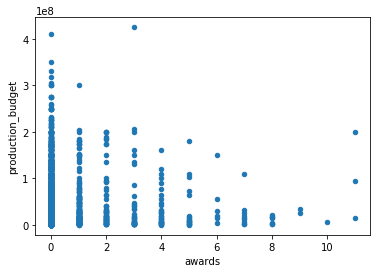

In [59]:
ax = awards_to_budget_df.plot.scatter(x='awards', y='production_budget')

In [60]:
import seaborn as sns

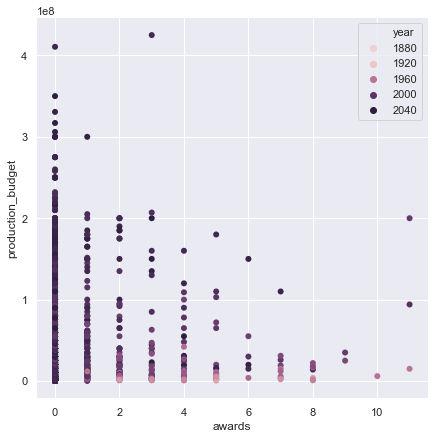

In [61]:
sns.set(style="darkgrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(7, 7))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="awards", y="production_budget",
                hue="year",
                hue_order='year',
                sizes=(1, 8), linewidth=0,
                data=awards_to_budget_df, ax=ax)



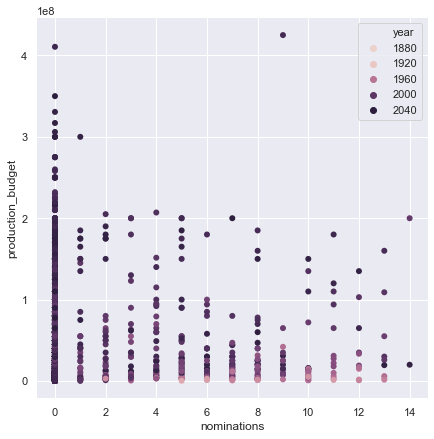

In [62]:
sns.set(style="darkgrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(7, 7))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="nominations", y="production_budget",
                hue="year",
                hue_order='year',
                sizes=(1, 8), linewidth=0,
                data=awards_to_budget_df, ax=ax)



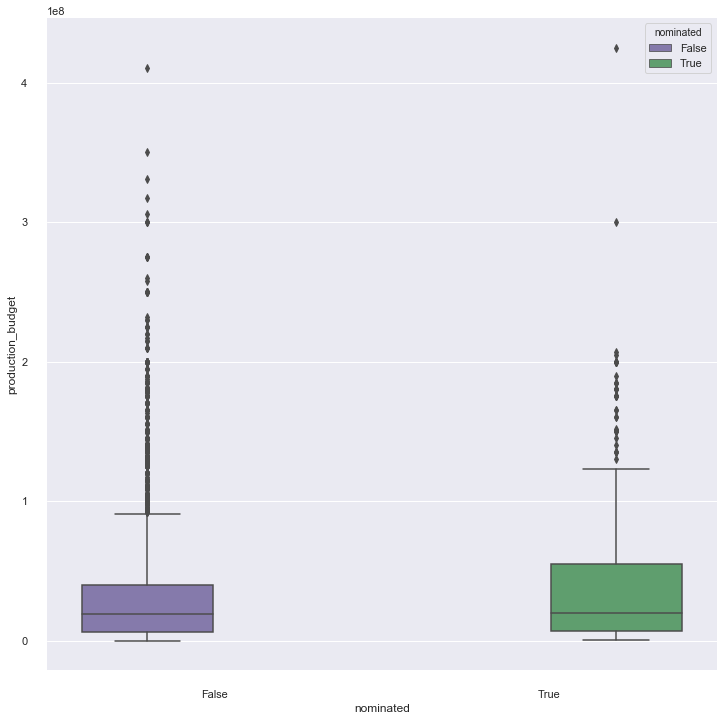

In [63]:
f, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(x="nominated", y="production_budget",
            hue="nominated", palette=["m", "g"],
            data=awards_to_budget_df)

sns.despine(offset=10, trim=True)

The our data is getting crunched by some far-reaching outliers. Let's remove the most extreme and see if we can get a better idea of the distribution of each category.

In [64]:
budget = awards_to_budget_df['production_budget']
removed_outliers = budget.between(budget.quantile(.01), budget.quantile(.99))
index_names = awards_to_budget_df[~removed_outliers].index                     # "~" is inverting the dataframe
print(index_names)

Int64Index([   0,    2,    3,    4,    6,   13,   17,   19,   28,   29,   37,
              45,   54,   61,   63,   65,   73,   81,   82,   85,   89,  101,
             108,  123,  167,  170,  210,  232,  236,  246,  264,  396,  530,
             633,  729,  883,  916, 1072, 1708, 2277, 2783, 2942, 3161, 3221,
            3292, 3310, 3360, 3383, 3456, 3501, 3518, 3535, 3547, 3559, 3563,
            3565, 3574, 3576, 3589, 3590, 3596, 3601, 3602, 3606, 3609, 3613,
            3616, 3619, 3623, 3630, 3633, 3638, 3660, 3661, 3662, 3664, 3665,
            3666, 3668, 3671, 3675, 3681, 3683, 3689, 3692, 3697, 3700, 3711,
            3717, 3718, 3719, 5341, 5781],
           dtype='int64')


In [69]:
awards_to_budget_df[~removed_outliers]

/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations,nominated


In [70]:
awards_to_budget_df.drop(index_names, inplace=True)

KeyError: '[   0    2    3    4    6   13   17   19   28   29   37   45   54   61\n   63   65   73   81   82   85   89  101  108  123  167  170  210  232\n  236  246  264  396  530  633  729  883  916 1072 1708 2277 2783 2942\n 3161 3221 3292 3310 3360 3383 3456 3501 3518 3535 3547 3559 3563 3565\n 3574 3576 3589 3590 3596 3601 3602 3606 3609 3613 3616 3619 3623 3630\n 3633 3638 3660 3661 3662 3664 3665 3666 3668 3671 3675 3681 3683 3689\n 3692 3697 3700 3711 3717 3718 3719 5341 5781] not found in axis'

In [71]:
awards_to_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
count,5322.000000,5.322000e+03,5.322000e+03,5.322000e+03,5322.000000,5.322000e+03,5322.000000,5322.000000
mean,50.520293,3.189081e+07,4.312545e+07,9.243528e+07,2003.536077,6.054447e+07,0.156520,0.377490
std,28.757318,3.754145e+07,6.383848e+07,1.589142e+08,12.596656,1.348992e+08,0.786875,1.654448
min,1.000000,1.000000e+05,0.000000e+00,2.600000e+01,1915.000000,-1.104502e+08,0.000000,0.000000
25%,26.000000,6.500000e+06,3.395438e+06,7.299368e+06,1999.000000,-1.970613e+06,0.000000,0.000000
50%,51.000000,1.900000e+07,2.038102e+07,3.342265e+07,2006.000000,1.200527e+07,0.000000,0.000000
75%,75.000000,4.000000e+07,5.503424e+07,1.030047e+08,2012.000000,6.668358e+07,0.000000,0.000000
max,100.000000,2.000000e+08,7.000596e+08,2.208208e+09,2019.000000,2.008208e+09,11.000000,14.000000


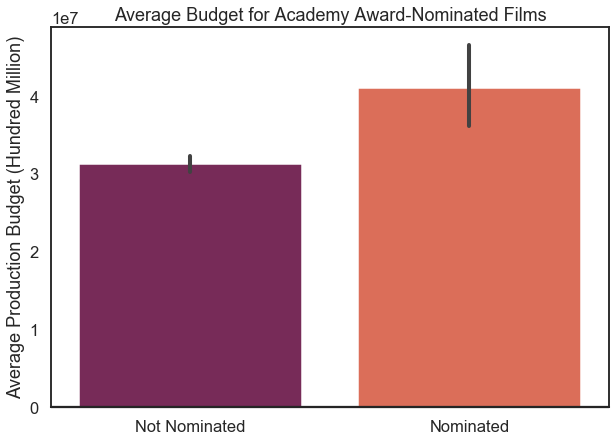

In [72]:
sns.set(style="white", context="talk")


# Set up the matplotlib figure
f, (ax1) = plt.subplots(figsize=(10, 7), sharex=True)

# Generate some sequential data
x = awards_to_budget_df['nominated']
y1 = awards_to_budget_df['production_budget']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Production Budget (Hundred Million)")
ax1.set_xlabel('')
ax1.set(xticklabels=["Not Nominated", "Nominated"])
ax1.set_title("Average Budget for Academy Award-Nominated Films");



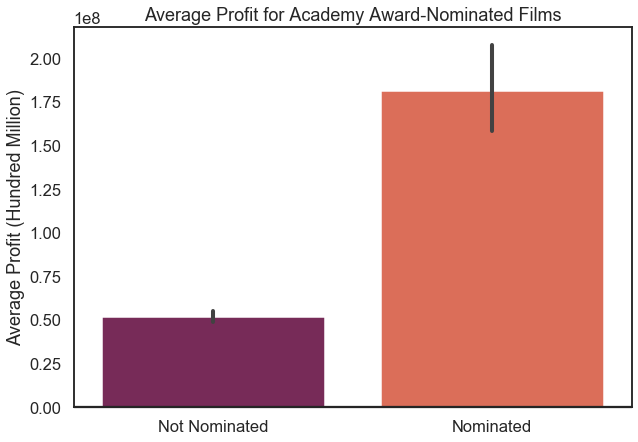

In [73]:
sns.set(style="white", context="talk")


# Set up the matplotlib figure
f, (ax1) = plt.subplots(figsize=(10, 7), sharex=True)

# Generate some sequential data
x = awards_to_budget_df['nominated']
y1 = awards_to_budget_df['budget_gross_profit']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Profit (Hundred Million)")
ax1.set_xlabel('')
ax1.set(xticklabels=["Not Nominated", "Nominated"])
ax1.set_title("Average Profit for Academy Award-Nominated Films");

This bar plot of average profit based on nominations helps us verify that nominated films return higher profits.

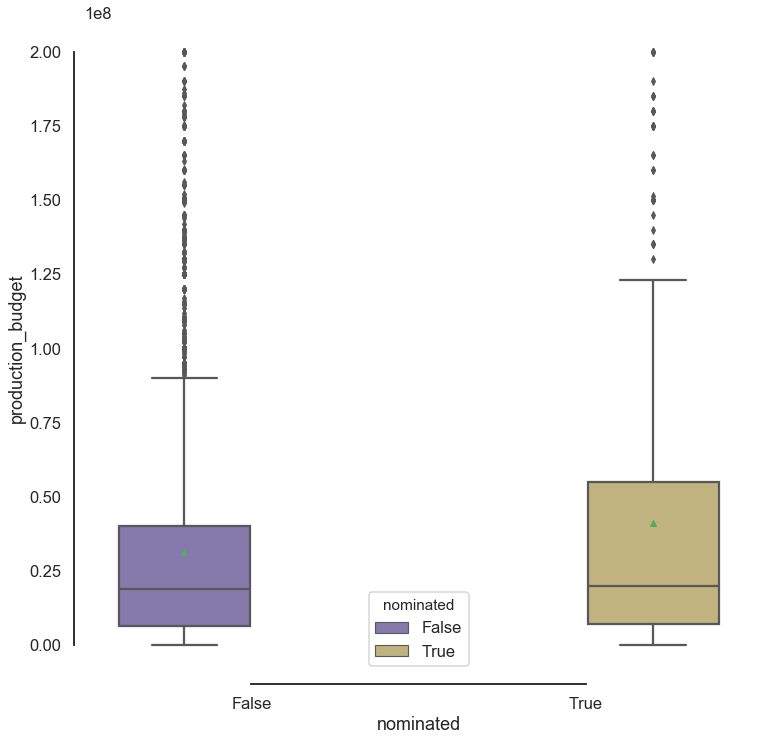

In [74]:
f, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(x="nominated", y="production_budget",
            hue="nominated", palette=["m", "y"],
            data=awards_to_budget_df, showmeans=True)

sns.despine(offset=10, trim=True)

Our last boxplot here shows us that, the data set does not have a normal distribution, and is positively skewed. It also shows us that while production_budgets are more variable for nominated films, the average budget is pulled higher by outliers in general. A logical explanation to this is that it costs more money to hire better acting talent, writers, directors, the rest of the professional film crew, etc, which should result in a better chance at an Academy Award.

Our barplots of budget tells us that, on average, award-nominated films spent more money up front in the production phase. We would suggest that things like higher-quality production, renowned film writers, directors and actors is worth spending more money on. If a film is nominated for an award, the subsequent profits are boosted substantially.

Future exploration: are the budget and gross values adjusted for inflation? 